In [1]:
# Atomic resolution image simulation notebook
# With a real probe
# Using AS and CEOS servers
# and pystemsim

In [2]:
# Run servers:
# central_server.py
# AS_server_SimAtomRes.py
# Ceos_sever_twin.py
# like this from the main folder: python -m asyncroscopy.servers.protocols.central_server

In [12]:
import sys
import ast
sys.path.insert(0, '../')
from asyncroscopy.clients.notebook_client import NotebookClient
import matplotlib.pyplot as plt

import pyTEMlib
from pyTEMlib import probe_tools as pt

### Connections:

In [13]:
# Connect the Client to the central (async) server
tem = NotebookClient.connect(host='localhost',port=9000)

# Tell the central server address of all connected instruments
routing_table= {"AS": ("localhost", 9001),
                "Gatan": ("localhost", 9002),
                "Ceos": ("localhost", 9003),
                "Preacquired_AS": ("localhost", 9004)}
tem.send_command('Central',"set_routing_table", routing_table)

Connecting to central server localhost:9000...
Connected to central server.


'[Central] Routing table updated'

In [14]:
# connect to the AutoScript computer and initialize microscope
tem.send_command('AS',command='connect_AS',args={'host':'localhost','port':9001})

'Connected to Digital Twin microscope.'

In [15]:
tem.send_command(destination = 'Ceos', command = 'getInfo', args = {})

'CEOS Digital Twin Server'

### Help commands:

In [16]:
# Now that we're routed to all instruments,
# let's take an inventory of commands available on each instrument
cmds = tem.send_command('AS', 'discover_commands')
print(cmds)

["connect_AS", "connectionLost", "connectionMade", "dataReceived", "disconnect", "discover_commands", "get_help", "get_scanned_image", "get_stage", "get_status", "lengthLimitExceeded", "logPrefix", "makeConnection", "pauseProducing", "resumeProducing", "sendString", "stopProducing", "stringReceived"]


In [17]:
# These two are working, but should be much better.
tem.send_command('AS', command='get_help', args={'command_name':'connect_AS'})

'{"name": "connect_AS", "signature": "(args: dict)", "summary": "Connect to the microscope via AutoScript", "doc": "Connect to the microscope via AutoScript"}'

### Setting the aberrations from known values:

In [18]:
aberrations = pt.get_target_aberrations("Spectra300", 60000)
tem.send_command(destination = 'Ceos', command = 'uploadAberrations', args = aberrations)
pt.print_aberrations(aberrations)

In [19]:
# at any time, we can view the current aberrations
# this should be implemented in the real ceos server as well
ab = tem.send_command(destination = 'Ceos', command = 'getAberrations', args={})
ab = ast.literal_eval(ab)
pt.print_aberrations(ab)

### Get an image:

simulated with pystemsim inside the AS_server_SimAtomRes (working with the Ceos server)

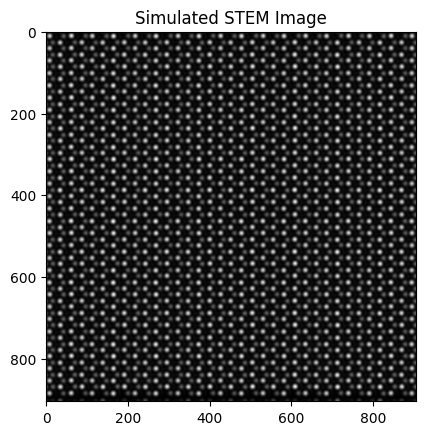

In [20]:
image_args = {'scanning_detector':'HAADF',
                'size':512,
                'dwell_time':10e-6}

img = tem.send_command('AS','get_scanned_image', image_args)

plt.imshow(img, cmap="gray")
plt.title("Simulated STEM Image")
plt.show()


### How it's actually working:
![Structure Diagram](../DT_workflow.png)

### try changing an aberration

In [ ]:
tem.send_command(destination = 'Ceos', command = 'correctAberration', args = {"name": 'C10', "value": -6})

In [ ]:
image_args = {'scanning_detector':'HAADF',
                'size':512,
                'dwell_time':10e-6}

img = tem.send_command('AS','get_scanned_image', image_args)

plt.imshow(img, cmap="gray")
plt.title("Simulated STEM Image")
plt.show()